## Classification Prediction and Performance Evaluations

### Project:
#### Performance Evaluations: ROC Curves

Bank Marketing data:  https://archive.ics.uci.edu/ml/datasets/bank+marketing. 

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

In this project, I will:
  * Train 3 different types of models to make classification predictions on the bank marketing dataset 
  * Calculate the accuracy, F1 score, precision, recall as comparison between 3 models on the same train/test splits 
  * Plot the ROC curve to confirm the best model.

In [1]:
# Import general stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Users/kienguyen/Documents/DATA SCIENCE/MSDS/07. MSDS680_Machine Learning/07. Week 7/assign_wk7/bank-additional/bank-additional-full.csv', sep = ';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
categorical_column = df.select_dtypes(include=['object'])
categorical_column.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [4]:
# Check unique values of categorical columns:
for i in categorical_column.columns:
    print(i)
    print(df[i].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']
y
['no' 'yes']


In [5]:
# Convert 'yes','no','unkown' value to 1,0,2:
for i in ['default','housing','loan','y']:
    df[i] = df[i].replace({'yes':1,'no':0,'unknown':2})

In [6]:
for i in categorical_column.columns:
    print(df[i].unique())

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
['married' 'single' 'divorced' 'unknown']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
[0 2 1]
[0 1 2]
[0 1 2]
['telephone' 'cellular']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['mon' 'tue' 'wed' 'thu' 'fri']
['nonexistent' 'failure' 'success']
[0 1]


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
df.describe()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,0.417525,0.571914,0.199767,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,0.812813,0.541209,0.456002,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,0.000000,0.000000,0.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,0.000000,1.000000,0.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,0.000000,1.000000,0.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,2.000000,2.000000,2.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [9]:
df.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

In [10]:
# Replace 999 by -1 to make the variable is not too skewed
df['pdays'] = df['pdays'].apply(lambda x: -1 if x == 999 else x)

In [11]:
df.pdays.unique()

array([-1,  6,  4,  3,  5,  1,  0, 10,  7,  8,  9, 11,  2, 12, 13, 14, 15,
       16, 21, 17, 18, 22, 25, 26, 19, 27, 20])

### Run the 3 models

In [12]:
# Import model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score,recall_score, f1_score,auc 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [13]:

# prepare data for predictions:
df_dummy = pd.get_dummies(df)
cols = df_dummy.columns
prediction_col = 'y'
feature_cols = [c for c in cols if c!= prediction_col]


x = df_dummy[feature_cols].values
y = df_dummy[prediction_col].values

# split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=41)



#### Train the models and compare performance scores

In [14]:
# Train models
# LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# Evaluate models
models = {
    'Logistic Regression': lr,
    'Decision Tree': dt,
    'Random Forest': rf}
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1-Score': f1_score}

results = []
for model_name, model in models.items():
    row = [model_name]
    for metric_name, metric_func in metrics.items():
        y_pred = model.predict(x_test)
        score = metric_func(y_test, y_pred)
        row.append(score)
    results.append(row)
# Create a pandas dataframe to view easily
columns = ['Model'] + list(metrics.keys())
performance_df = pd.DataFrame(results, columns=columns)

# Print the results
print(performance_df)

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.908068   0.652406  0.357771  0.462121
1        Decision Tree  0.893502   0.516506  0.550587  0.533002
2        Random Forest  0.915352   0.664596  0.470674  0.551073


According to the performance score table, we can see that:
* Random Forest is the model which have the accuracy, precision, and f1-score are all better than other 2 models, except the recall score.
* Decision Tree's scores are also considered when the gap between its scores with Random Forest's ones are not really big.
* Now I will interpret Precision and Recall to choose the best model. Let's consider the importance between false positive and false negative. In this case, a potential customer that is incorrectly predicted (false negative) can cause less loss for business than a not potential customer that is incorrectly predicted (false positive). If we wrongly not invest in a potential customer, they may still become our customer, however when we wrongly invest in a not potential customer, this will lose business money. Hence, the precision score is more important than recall in this case. That's why, I will consider the Random Forest as the best model.

#### Plot the confusion matrix for models

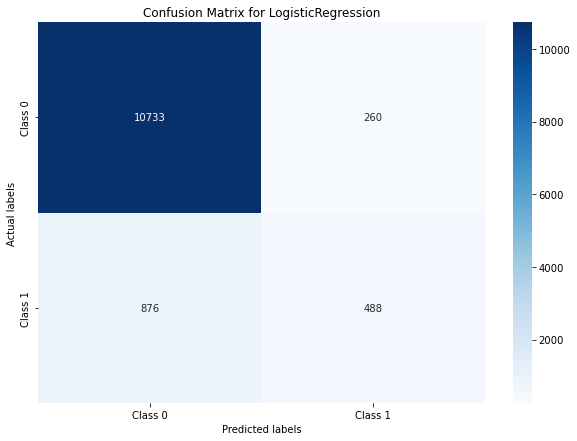

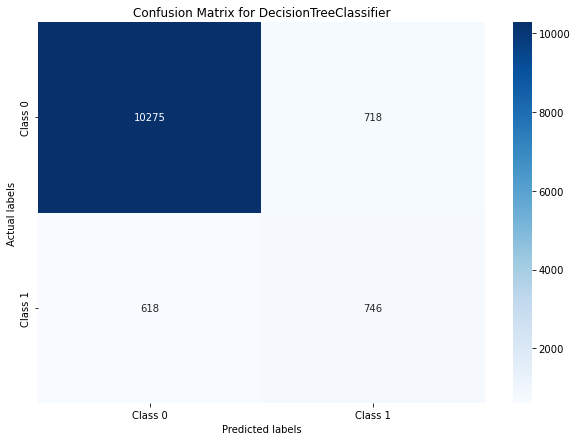

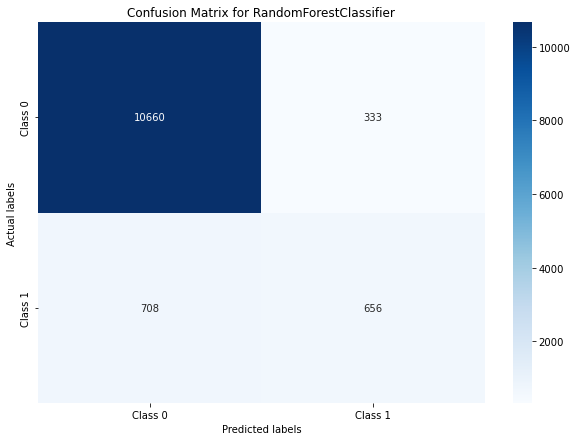

In [17]:
for model in classifiers:
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    
    # plot the confusion matrix as a heatmap
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel("Predicted labels")
    plt.ylabel("Actual labels")
    plt.title("Confusion Matrix for {}".format(model.__class__.__name__))
    plt.show()

Looking at the confusion matrix we can see the Decision Tree did a better job in predicting the positive labels than RandomForest as the previous analysis.

#### Plot the ROC curve for models to confirm the best one

Now, let's confirm the best model by the ROC curve

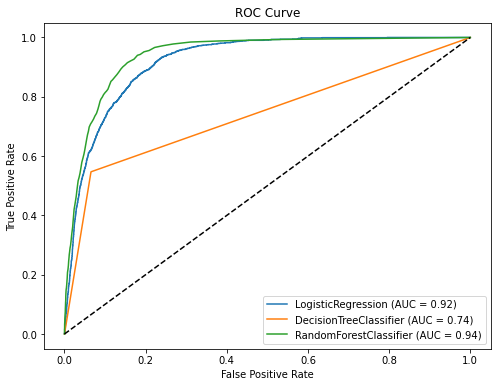

In [15]:
# Define a list of classifiers to use
classifiers = [
    LogisticRegression(random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),]
# Plot the ROC curve for each classifier
plt.figure(figsize=(8, 6))

for clf in classifiers:
    clf.fit(x_train, y_train)
    y_pred = clf.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{clf.__class__.__name__} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

That's great, the ROC curve has confirmed the RandomForestClassifier model is the best one with the curve is the most closet to the left upper corner.